In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel


import statsmodels.api as sm
import scipy.stats as stats
from scipy.io import loadmat

In [2]:
df = pd.read_csv("huatbien.csv")

In [3]:
df.columns= ['Año','Mes','Día','Hora(utc)','Altura(mm)']

In [4]:
df.head(1)

,Año,Mes,Día,Hora(utc),Altura(mm)
0,2016,5,6,2,-28


In [5]:
#pasando la fecha a otro fomrato
from datetime import datetime
df['Fecha']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Año'],x[u'Mes'], x[u'Día'], x[u'Hora(utc)']), "%Y %m %d %H"),axis=1)

In [6]:
df['Altura(mm)']= pd.to_numeric(df['Altura(mm)'], errors='coerce') #para pasar la altura de ovbjetc a float

In [7]:
df.dtypes

Año                    int64
Mes                    int64
Día                    int64
Hora(utc)              int64
Altura(mm)             int64
Fecha         datetime64[ns]
dtype: object

In [8]:
df.head(1),df.tail(1)

(    Año  Mes  Día  Hora(utc)  Altura(mm)               Fecha
 0  2016    5    6          2         -28 2016-05-06 02:00:00,
        Año  Mes  Día  Hora(utc)  Altura(mm)               Fecha
 2596  2016    8   22          6           0 2016-08-22 06:00:00)

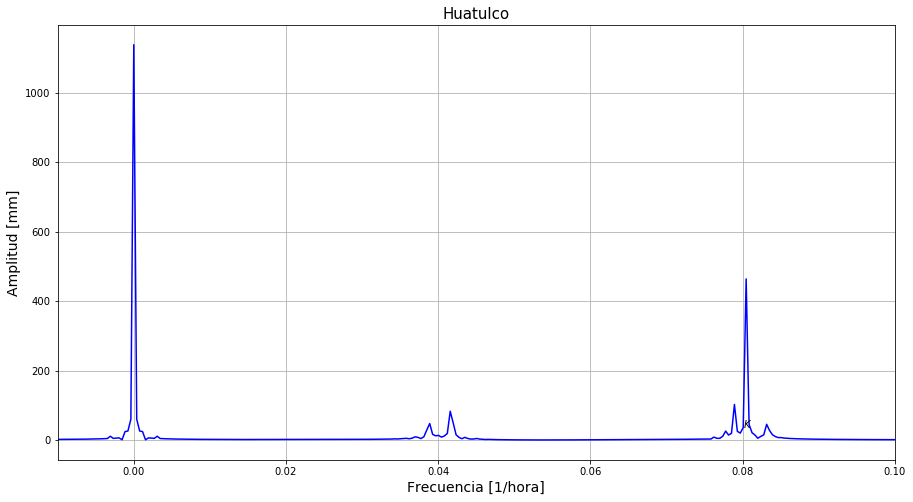

In [9]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N = 2597
# Separacion de tiempo entre cada medicion
T = 1.0

#aplicacion de la transformada de fourier a los datos
y = df[u"Altura(mm)"]
yf = fft(y)
 #Cambio de variable de tiempo a uno de frecuencias.
xf = fftfreq(N, T)
xf = fftshift(xf)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot = fftshift(yf)

#grafica de lo obtenido con la transformada de Fourier
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N *np.abs(yplot), 'b-')
plt.xlim(-0.01, 0.1) 
plt.grid(True)
plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [mm]', fontsize=14)
plt.title('Huatulco', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(15, 8)


#Calando a ver si jala
plt.text(0.0800924143242,35.9728997701, '$K$')
plt.show()

In [10]:
a = 2*np.absolute(yf)/N 

In [11]:
print(np.where(a[:,]>25)) #### ando con esto
b= a[a[:,]>25]
b

(array([   0,    1,    2,  100,  101,  108,  109,  202,  205,  208,  209,
        210,  216,  217, 2380, 2381, 2387, 2388, 2389, 2392, 2395, 2488,
       2489, 2496, 2497, 2595, 2596], dtype=int64),)


array([ 1137.79283789,    59.90169929,    26.06367895,    28.92596781,
          47.49734193,    82.76279772,    49.69035015,    25.71511853,
         102.37608803,    35.97289977,   463.70108706,    44.79733118,
          45.24414595,    27.11388926,    27.11388926,    45.24414595,
          44.79733118,   463.70108706,    35.97289977,   102.37608803,
          25.71511853,    49.69035015,    82.76279772,    47.49734193,
          28.92596781,    26.06367895,    59.90169929])

In [12]:
#son 14, luego comienza a repetirse,

In [13]:

#
print( 'Armonico de prueba')
print('Amplitud=',2.0*np.absolute(yf[208,]/N))
print('frecuencia=', xf[int(N/2 +208),])
print('periodo=', 1/xf[int(N/2 +208),])
print()

Armonico de prueba
Amplitud= 35.9728997701
frecuencia= 0.0800924143242
periodo= 12.4855769231



In [14]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N = 2597
# Separacion de tiempo entre cada medicion
T = 1.0

#aplicacion de la transformada de fourier a los datos
y = df[u"Altura(mm)"]
yf = fft(y)
 #Cambio de variable de tiempo a uno de frecuencias.
xf = fftfreq(N, T)
xf = fftshift(xf)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot = fftshift(yf)

#Amplitudes
A0 = np.absolute(yf[int(0),]/N)
A1 = 2.0*np.absolute(yf[int(1),]/N)
A2 = 2.0*np.absolute(yf[int(2),]/N)
A3= 2.0*np.absolute(yf[int(100),]/N)
A4 = 2.0*np.absolute(yf[int(101),]/N)
A5 = 2.0*np.absolute(yf[int(108),]/N)
A6 = 2.0*np.absolute(yf[int(109),]/N)
A7 = 2.0*np.absolute(yf[int(202),]/N)
A8 = 2.0*np.absolute(yf[int(205),]/N)
A9 = 2.0*np.absolute(yf[int(208),]/N)
A10 =  2.0*np.absolute(yf[int(209),]/N)
A11 = 2.0*np.absolute(yf[int(210),]/N)
A12 = 2.0*np.absolute(yf[int(216),]/N)
A13 = 2.0*np.absolute(yf[int(217),]/N)


In [15]:
#frecuencias (N/2=1298.5)
fA1 = xf[int(1298.5 +1)]
fA2 = xf[int(1298.5 +2),]
fA3 =  xf[int(1298.5 +100),]
fA4 =  xf[int(1298.5 +101),]
fA5 =  xf[int(1298.5 +108),]
fA6 =  xf[int(1298.5 +109),]
fA7 =  xf[int(1298.5 +202),]
fA8 =  xf[int(1298.5 +205),]
fA9 =  xf[int(1298.5 +208),]
fA10 =  xf[int(1298.5 +209),]
fA11 =  xf[int(1298.5 +210),]
fA12 =  xf[int(1298.5 +216),]
fA13 =  xf[int(1298.5 +217),]

In [16]:
# Fases 
FSA0 = np.angle(yf[int(0),])
FSA1 = np.angle(yf[int(1),])
FSA2 = np.angle(yf[int(2),])
FSA3 = np.angle(yf[int(100),])
FSA4 = np.angle(yf[int(101),])
FSA5 = np.angle(yf[int(108),])
FSA6 =  np.angle(yf[int(109),])
FSA7 =  np.angle(yf[int(202),])
FSA8 =  np.angle(yf[int(205),])
FSA9 =  np.angle(yf[int(208),])
FSA10 =  np.angle(yf[int(209),])
FSA11 =  np.angle(yf[int(210),])
FSA12 =  np.angle(yf[int(216),])
FSA13 =  np.angle(yf[int(217),])


In [17]:
z = np.arange(0, 2596, 1.0)

In [18]:
df['T'] =  pd.Series(z, index =None)

In [19]:
df.head(1)

,Año,Mes,Día,Hora(utc),Altura(mm),Fecha,T
0,2016,5,6,2,-28,2016-05-06 02:00:00,0.0


In [20]:
#Obteniendo la marea
w= 2.0*np.pi
def f(t):
    return A0 + (A1*np.cos(w*fA1*t+FSA1) + A2*np.cos(w*fA2 *t+FSA2) 
                   + A3*np.cos(w*fA3*t+FSA3) + A4*np.cos(w*fA4*t +FSA4)
                   + A5*np.cos(w*fA5*t+FSA5) + A6*np.cos(w*fA6*t +FSA6)
                   + A7*np.cos(w*fA7*t+FSA7) + A8*np.cos(w*fA8*t+ FSA8)
                   + A9*np.cos(w*fA9*t+ FSA9) + A10*np.cos(w*fA10*t+ FSA10) 
                   + A11*np.cos(w*fA11*t+ FSA11) + A12*np.cos(w*fA12*t+ FSA12)
                   + A13*np.cos(w*fA13*t+ FSA13))

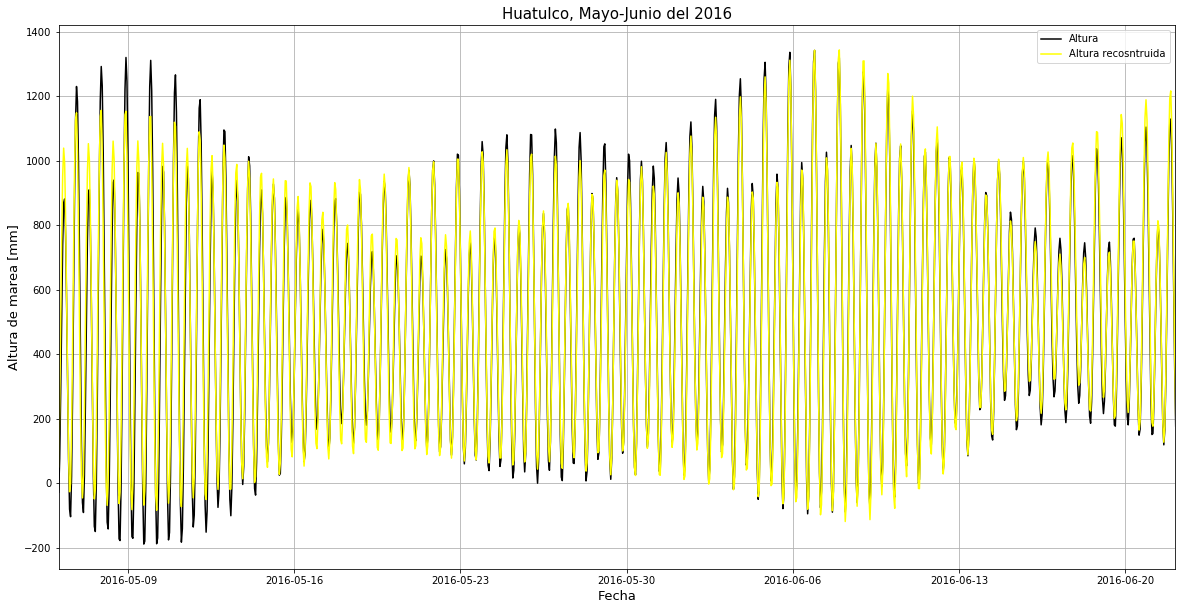

In [26]:
#mostrando la aproximación y la real
import matplotlib.pyplot as plt

#Marea original
plt.plot(df['Fecha'], y, color='black', label ="Altura") #label es para identificar a la curva

#Aproximación de marea
plt.plot(df['Fecha'], f(df['T']), color='yellow', label='Altura recosntruida')

plt.ylabel('Altura de marea [mm]', fontsize = 13) #titulo eje Y
plt.xlabel('Fecha', fontsize = 13)  #título eje X
plt.title('Huatulco, Mayo-Junio del 2016', fontsize= 15) #Título del gráfico

#para mostrar de que curva se trata
plt.legend()

plt.xlim(pd.Timestamp("2016-05-06 02:00:00"), pd.Timestamp('2016-06-22 02:00:00'))#intervalo de fecha que se mostrará
plt.grid(True) 
fig = plt.gcf()
fig.set_size_inches(20, 10)

plt.show()

In [22]:
# error:
y_0=df['Altura(mm)']
y_1=f(df['T'])

In [23]:
E= np.sum(abs(y_0-y_1)**2) / np.sum(np.abs(y_0)**2)
E

0.007511263079838983

In [24]:
df.head()

,Año,Mes,Día,Hora(utc),Altura(mm),Fecha,T
0,2016,5,6,2,-28,2016-05-06 02:00:00,0.0
1,2016,5,6,3,76,2016-05-06 03:00:00,1.0
2,2016,5,6,4,277,2016-05-06 04:00:00,2.0
3,2016,5,6,5,519,2016-05-06 05:00:00,3.0
4,2016,5,6,6,736,2016-05-06 06:00:00,4.0


In [25]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2587,2588,2589,2590,2591,2592,2593,2594,2595,2596
Año,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
Mes,5,5,5,5,5,5,5,5,5,5,...,8,8,8,8,8,8,8,8,8,8
Día,6,6,6,6,6,6,6,6,6,6,...,21,21,21,22,22,22,22,22,22,22
Hora(utc),2,3,4,5,6,7,8,9,10,11,...,21,22,23,0,1,2,3,4,5,6
Altura(mm),-28,76,277,519,736,870,882,767,556,305,...,894,1107,1191,1123,921,630,321,74,-43,0
Fecha,2016-05-06 02:00:00,2016-05-06 03:00:00,2016-05-06 04:00:00,2016-05-06 05:00:00,2016-05-06 06:00:00,2016-05-06 07:00:00,2016-05-06 08:00:00,2016-05-06 09:00:00,2016-05-06 10:00:00,2016-05-06 11:00:00,...,2016-08-21 21:00:00,2016-08-21 22:00:00,2016-08-21 23:00:00,2016-08-22 00:00:00,2016-08-22 01:00:00,2016-08-22 02:00:00,2016-08-22 03:00:00,2016-08-22 04:00:00,2016-08-22 05:00:00,2016-08-22 06:00:00
T,0,1,2,3,4,5,6,7,8,9,...,2587,2588,2589,2590,2591,2592,2593,2594,2595,NaN
